# MALARIA

### IMPORTS

In [12]:
#pip install opencv-python

In [13]:
#!pip install scikit-learn

In [14]:
import cv2
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import warnings

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Input,BatchNormalization,Reshape
import tensorflow as tf

warnings.filterwarnings("ignore", category=DeprecationWarning)

### READING DATA

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from PIL import Image

# 1. Load images and labels
img_list = []
label_list = []

labels = ['Uninfected', 'Parasitized']
img_path = '/kaggle/input/cell-images-for-detecting-malaria/cell_images/'

for label in labels:
    label_path = os.path.join(img_path, label)
    for img_file in os.listdir(label_path):
        if img_file.lower().endswith('.png'):
            img_full_path = os.path.join(label_path, img_file)
            try:
                img = Image.open(img_full_path).resize((64, 64))  # Resize for simplicity
                img_array = np.array(img)
                if img_array.shape == (64, 64, 3):  # Ensure all are RGB
                    img_list.append(img_array)
                    label_list.append(label)
            except:
                continue

# 2. Preprocessing
X = np.array(img_list) / 255.0  # Normalize pixel values
X = X.reshape(len(X), -1)       # Flatten images
le = LabelEncoder()
y = le.fit_transform(label_list)  # 0 for 'Parasitized', 1 for 'Uninfected'

# 3. Shuffle and split data
X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# 5. Evaluate the model
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# 6. Print results
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy: 0.7941
Test Accuracy: 0.7007
F1 Score: 0.7121


In [15]:
labels = ['Uninfected','Parasitized']
img_path= '/kaggle/input/cell-images-for-detecting-malaria/cell_images/'

In [16]:
img_list = []
label_list = []
for label in labels:
    label_path = os.path.join(img_path, label)
    
    for img_file in os.listdir(label_path):
        if img_file.lower().endswith('.png'):
            img_list.append(os.path.join(label_path, img_file))
            label_list.append(label)

### CREATING DATAFRAME

In [17]:
df = pd.DataFrame({'img':img_list,'label':label_list})
df.head()

,img,label
0,/kaggle/input/cell-images-for-detecting-malari...,Uninfected
1,/kaggle/input/cell-images-for-detecting-malari...,Uninfected
2,/kaggle/input/cell-images-for-detecting-malari...,Uninfected
3,/kaggle/input/cell-images-for-detecting-malari...,Uninfected
4,/kaggle/input/cell-images-for-detecting-malari...,Uninfected


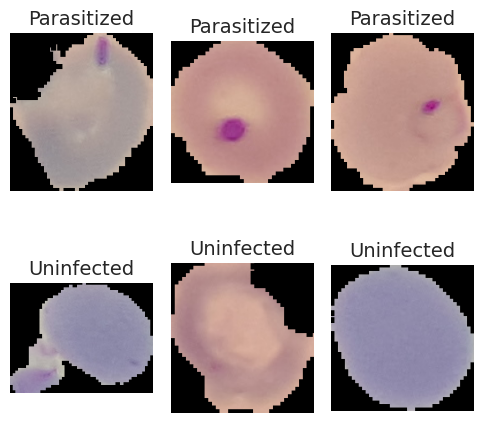

In [18]:
selected_images = df.groupby('label', as_index=False).apply(lambda x: x.sample(n=3, random_state=1)).reset_index(drop=True)

sns.set(style='whitegrid')
fig, axes = plt.subplots(2, 3, figsize=(5, 5))

axes = axes.flatten()

for ax, (img_path, label) in zip(axes, zip(selected_images['img'], selected_images['label'])):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off') 
    ax.set_title(label, fontsize=14) 
    
plt.tight_layout()
plt.show()

In [19]:
labelEncode = {'Uninfected':0,'Parasitized':1}
df['encode_label'] = df['label'].map(labelEncode)

In [20]:
df.head()

,img,label,encode_label
0,/kaggle/input/cell-images-for-detecting-malari...,Uninfected,0
1,/kaggle/input/cell-images-for-detecting-malari...,Uninfected,0
2,/kaggle/input/cell-images-for-detecting-malari...,Uninfected,0
3,/kaggle/input/cell-images-for-detecting-malari...,Uninfected,0
4,/kaggle/input/cell-images-for-detecting-malari...,Uninfected,0


### PREPARING TEST DATA

In [21]:
x = []
for img_path in df['img']:
    img = cv2.imread(img_path)
    if img is None:
        continue

    img = cv2.resize(img, (170, 170))
    img = img / 255.0
    x.append(img)

In [ ]:
x = np.array(x)
y = df['encode_label']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## CNN

In [ ]:
model = Sequential()
model.add(Input(shape=(170,170,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']);

In [ ]:
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test),verbose=0)